In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [50]:
len(df)

53940

In [51]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [52]:
df['cut'].astype('category').cat.codes 

1        2
2        3
3        1
4        3
5        1
6        4
7        4
8        4
9        0
10       4
11       1
12       2
13       3
14       2
15       3
16       3
17       2
18       1
19       1
20       4
21       1
22       4
23       4
24       4
25       4
26       4
27       3
28       4
29       4
30       4
        ..
53911    3
53912    3
53913    3
53914    1
53915    1
53916    2
53917    1
53918    4
53919    3
53920    2
53921    4
53922    4
53923    4
53924    2
53925    2
53926    2
53927    2
53928    1
53929    3
53930    2
53931    3
53932    3
53933    4
53934    4
53935    3
53936    2
53937    1
53938    4
53939    3
53940    2
Length: 53940, dtype: int8

In [53]:
# creo il dizionario
cut_class_dict = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
clarity_dict = {"I3": 1, "I2": 2, "I1": 3, "SI2": 4, "SI1": 5, "VS2": 6, "VS1": 7, "VVS2": 8, "VVS1": 9, "IF": 10, "FL": 11}
color_dict = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}

In [54]:
df['cut'] = df['cut'].map(cut_class_dict)
df['clarity'] = df['clarity'].map(clarity_dict)
df['color'] = df['color'].map(color_dict)

In [55]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,4,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,5,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,7,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,6,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,4,63.3,58.0,335,4.34,4.35,2.75


In [56]:
import sklearn
from sklearn import svm, preprocessing

In [57]:
df = sklearn.utils.shuffle(df)

X = df.drop('price', axis=1).values
X = sklearn.preprocessing.scale(X)

y = df['price'].values

test_size = 200

X_train = X[:-test_size] 
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

In [58]:
X

array([[-0.92391017,  0.08588908, -0.8264134 , ..., -0.9905566 ,
        -1.0108586 , -1.10350329],
       [-1.00829713,  0.98147332,  1.52502147, ..., -1.19559331,
        -1.15094846, -1.18852618],
       [-0.08004051,  0.08588908,  0.34930404, ...,  0.05245622,
         0.03105971,  0.10098767],
       ...,
       [ 0.00434646, -0.80969515, -1.41427211, ...,  0.24857829,
         0.25870573,  0.17184008],
       [ 1.43892488,  0.08588908, -1.41427211, ...,  1.47879855,
         1.3881802 ,  1.37633104],
       [ 0.44737803,  0.08588908, -0.8264134 , ...,  0.75671275,
         0.72275338,  0.49776116]])

In [59]:
clf = svm.SVR(kernel='linear')
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
clf.score(X_test, y_test)

0.8573614732895276

In [61]:
for X,y in zip(X_test, y_test):
    print(f'Model: {clf.predict([X])[0]}, \t Actual: {y}')

Model: 1526.5543121881942, 	 Actual: 1320
Model: 240.4417714368874, 	 Actual: 452
Model: 8565.349921218827, 	 Actual: 9831
Model: 589.7117772397037, 	 Actual: 956
Model: 994.7648853810306, 	 Actual: 1116
Model: 9443.287750888127, 	 Actual: 15137
Model: 1640.801286875992, 	 Actual: 1212
Model: 13760.102672782315, 	 Actual: 8220
Model: 6342.929460742338, 	 Actual: 7983
Model: 1890.1086942901352, 	 Actual: 1786
Model: 2885.390265150382, 	 Actual: 2767
Model: 6039.825205078905, 	 Actual: 6163
Model: 4101.167439769214, 	 Actual: 3751
Model: 3541.4522212380643, 	 Actual: 3182
Model: 1237.1654041564198, 	 Actual: 1154
Model: 1230.0494706125905, 	 Actual: 948
Model: 1493.352514277895, 	 Actual: 1257
Model: 13817.076614833917, 	 Actual: 18797
Model: 283.4116637896914, 	 Actual: 683
Model: 1535.462863581542, 	 Actual: 1433
Model: -4.476860645219858, 	 Actual: 675
Model: 380.2414208643827, 	 Actual: 649
Model: 1474.9428683039546, 	 Actual: 1395
Model: 2530.8037002483657, 	 Actual: 2130
Model: 385

(array([  6.,   6.,   4.,   8.,  26., 136.,  10.,   2.,   0.,   2.]),
 array([-6586.85960267, -5374.16337512, -4161.46714758, -2948.77092003,
        -1736.07469249,  -523.37846494,   689.3177626 ,  1902.01399015,
         3114.71021769,  4327.40644524,  5540.10267278]),
 <a list of 10 Patch objects>)

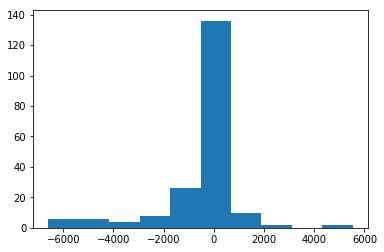

In [62]:
residue = clf.predict(X_test)-y_test
plt.hist(residue)

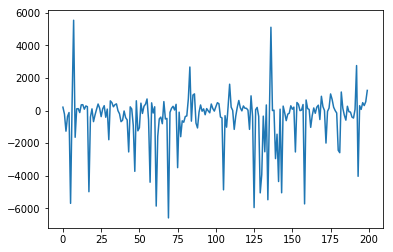

In [63]:
plt.plot(residue)

In [64]:
clf = svm.SVR(kernel='rbf')
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print('')
for X,y in zip(X_test, y_test):
    print(f'Model: {clf.predict([X])[0]}, \t Actual: {y}')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5096729626422254

Model: 1668.626762130407, 	 Actual: 1320
Model: 951.9896188152193, 	 Actual: 452
Model: 5164.153365723093, 	 Actual: 9831
Model: 805.144165721797, 	 Actual: 956
Model: 1154.9383722555576, 	 Actual: 1116
Model: 7315.691127339757, 	 Actual: 15137
Model: 1362.0766618171488, 	 Actual: 1212
Model: 5601.990663460841, 	 Actual: 8220
Model: 6507.391594591691, 	 Actual: 7983
Model: 1837.5963428284292, 	 Actual: 1786
Model: 2673.482986996885, 	 Actual: 2767
Model: 6273.455449029301, 	 Actual: 6163
Model: 4141.962788711473, 	 Actual: 3751
Model: 3324.368431801035, 	 Actual: 3182
Model: 1063.9940473360393, 	 Actual: 1154
Model: 1020.1980241114538, 	 Actual: 948
Model: 1707.9299647095327, 	 Actual: 1257
Model: 6194.225399497622, 	 Actual: 18797
Model: 631.8274044475584, 	 Actual: 683
Model: 1300.9630673157735, 	 Actual: 1433
Model: 569.3013210023387, 	 Actual: 675
Model: 496.53372538171516, 	 Actual: 649
Model: 1384.248317032638, 	 Actual: 1395
Model: 2173.534426809533, 	 Actual

(array([  3.,   2.,   1.,   4.,   7.,   2.,   9.,  10.,  20., 142.]),
 array([-14057.77596158, -12542.53794399, -11027.2999264 ,  -9512.06190881,
         -7996.82389122,  -6481.58587363,  -4966.34785604,  -3451.10983845,
         -1935.87182087,   -420.63380328,   1094.60421431]),
 <a list of 10 Patch objects>)

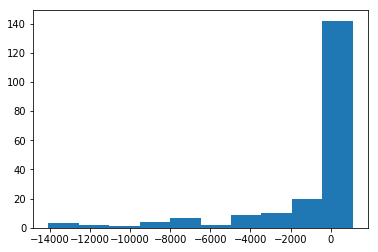

In [65]:
residue = clf.predict(X_test)-y_test
plt.hist(residue)

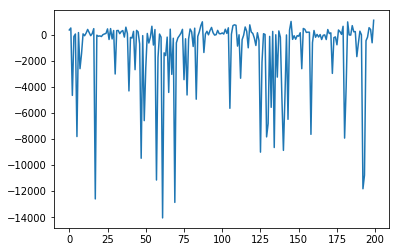

In [66]:
plt.plot(residue)